In [1]:
import numpy as np
import pandas as pd
import scipy as sc
np.random.seed(1)
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from sklearn.metrics import log_loss
init_notebook_mode(connected=True)

In [2]:
N =100
D = 2
X=pd.DataFrame(np.hstack([np.ones([N, 1]),np.random.randn(N,D)]))
X.iloc[:50,[1,2]] = X.iloc[:50,[1,2]] -2
X.iloc[50:,[1,2]] = X.iloc[50:,[1,2]] +2
y_true = np.hstack((np.zeros(50),np.ones(50)))
# Random weights 
w = np.random.randn(D+1)
print(w)

[-0.40087819  0.82400562 -0.56230543]


In [3]:
l = 0.1
reg_lambda = 0.1
for i in range(100):
    y_pred = sc.special.expit(X.dot(w)).values
    if i%10 == 0:
        print(log_loss(y_true,y_pred,normalize=False))
    w = w + l*((y_true - y_pred).dot(X) - reg_lambda*w).reshape(D+1)    
print(w)

53.94476269944936
0.00038269643444999087
0.0008750722577291957
0.0018598873100509343
0.003696742332399376
0.006905724023978004
0.012171875656390281
0.020300420212539562
0.03209560189896275
0.04814369470847653
[0.00580587 2.89969777 3.019947  ]


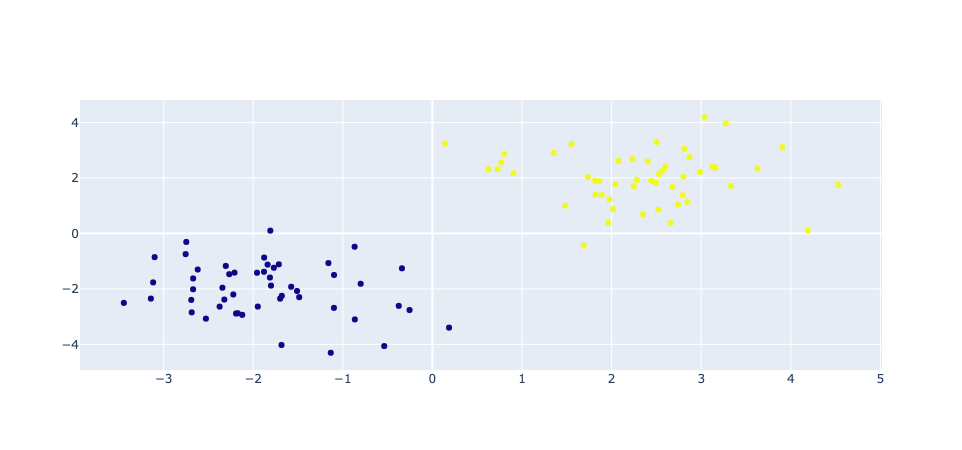

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= X.iloc[:,[1]].values.reshape(-1)
                         ,y=X.iloc[:,[2]].values.reshape(-1),mode ='markers',
                         marker=dict(color=y_true)))
fig.show()